In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import yfinance as yf

In [32]:
S= "MMM"
stk = yf.Ticker(S)
df= stk.history(period="10y")
df.iloc[:,0:5].to_csv("..//model_data//"+S+".csv")

In [33]:
df= pd.read_csv("..//model_data//"+S+".csv",index_col="Date",parse_dates=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-11-02,64.898075,65.081731,64.523120,64.890427,3815200
2010-11-03,65.158257,65.487301,63.742606,65.273041,4081700
2010-11-04,66.030610,67.239655,65.885216,66.604523,6606100
2010-11-05,66.925901,66.948856,65.808684,66.068855,3724300
2010-11-08,65.655665,66.267836,65.464361,65.701576,5515100


In [34]:
df.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-11-02 to 2020-11-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2518 non-null   float64
 1   High    2518 non-null   float64
 2   Low     2518 non-null   float64
 3   Close   2518 non-null   float64
 4   Volume  2518 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


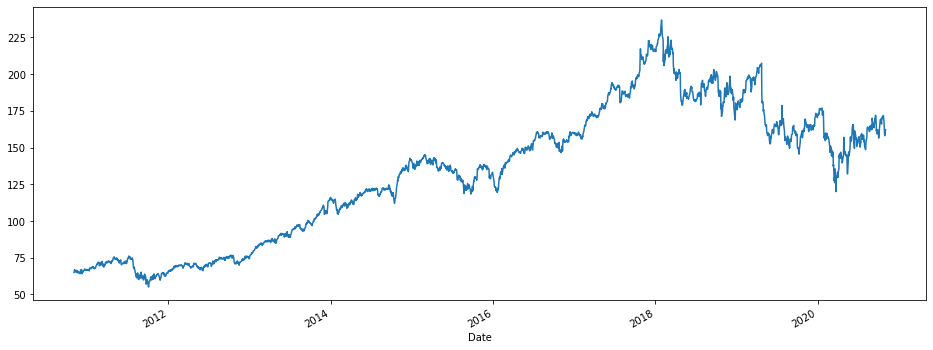

In [36]:
df['Open'].plot(figsize=(16,6))

In [37]:
df= df[['Open']]
training_df= df[:int(len(df)*(4/5))]
testing_df= df[int(len(df)*(4/5)):]

In [38]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_df = sc.fit_transform(training_df)
testing_df= sc.transform(testing_df)

# Training

In [39]:
X_train = []
y_train = []
for i in range(60, len(training_df)-4):
    X_train.append(training_df[i-60:i])
    y_train.append(training_df[i+4, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [40]:
X_train.shape

(1950, 60, 1)

In [41]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [42]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [43]:
# Initialising the RNN
regressor = Sequential()

In [44]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))


In [45]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1950/1950 [==============================] - 7s 4ms/step - loss: 0.0201
Epoch 2/100
1950/1950 [==============================] - 6s 3ms/step - loss: 0.0029
Epoch 3/100
1950/1950 [==============================] - 7s 4ms/step - loss: 0.0030
Epoch 4/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0031
Epoch 5/100
1950/1950 [==============================] - 9s 5ms/step - loss: 0.0028
Epoch 6/100
1950/1950 [==============================] - 9s 4ms/step - loss: 0.0025
Epoch 7/100
1950/1950 [==============================] - 9s 5ms/step - loss: 0.0026
Epoch 8/100
1950/1950 [==============================] - 9s 5ms/step - loss: 0.0025
Epoch 9/100
1950/1950 [==============================] - 9s 5ms/step - loss: 0.0026
Epoch 10/100
1950/1950 [==============================] - 9s 5ms/step - loss: 0.0024
Epoch 11/100
1950/1950 [==============================] - 9s 5ms/step - loss: 0.0024
Epoch 12/100
1950/1950 [==============================] - 9s 5ms/step - lo

1950/1950 [==============================] - 8s 4ms/step - loss: 9.9305e-04
Epoch 98/100
1950/1950 [==============================] - 8s 4ms/step - loss: 0.0010
Epoch 99/100
1950/1950 [==============================] - 8s 4ms/step - loss: 9.9002e-04
Epoch 100/100
1950/1950 [==============================] - 7s 4ms/step - loss: 0.0011


# Testing

In [46]:
X_test = []
y_test = []
for i in range(60, len(testing_df)-4):
    X_test.append(testing_df[i-60:i])
    y_test.append(testing_df[i+4, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [48]:
predicted_stock_price = regressor.predict(X_test)

In [49]:
y_test= np.reshape(y_test, (y_test.shape[0], 1))
y_test.shape

(440, 1)

In [50]:
y_test

array([[0.73824828],
       [0.73721392],
       [0.7279043 ],
       [0.73674824],
       [0.74678197],
       [0.76860769],
       [0.77340897],
       [0.77273199],
       [0.78028313],
       [0.78559503],
       [0.78158518],
       [0.77955403],
       [0.79361483],
       [0.7941878 ],
       [0.78908424],
       [0.78622   ],
       [0.78497009],
       [0.78590761],
       [0.76814908],
       [0.76372261],
       [0.75242184],
       [0.73065346],
       [0.74888051],
       [0.77991854],
       [0.77465877],
       [0.77398175],
       [0.78283496],
       [0.78304327],
       [0.78648033],
       [0.78595968],
       [0.77450267],
       [0.78226207],
       [0.75710872],
       [0.76512862],
       [0.77762718],
       [0.78075187],
       [0.78746983],
       [0.79059439],
       [0.80283267],
       [0.80653005],
       [0.80939436],
       [0.82178885],
       [0.81569579],
       [0.81418552],
       [0.8037701 ],
       [0.80007258],
       [0.81772673],
       [0.826

In [51]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
actual_stock_price = sc.inverse_transform(y_test)

In [52]:
predicted_stock_price

array([[183.29301],
       [184.36345],
       [185.81503],
       [186.83714],
       [187.4331 ],
       [187.77344],
       [187.94115],
       [187.77167],
       [187.6667 ],
       [188.046  ],
       [189.37912],
       [191.27669],
       [192.96773],
       [194.20682],
       [195.04321],
       [195.39554],
       [195.34775],
       [195.53964],
       [196.05319],
       [196.54825],
       [196.8    ],
       [196.82089],
       [196.78555],
       [196.31625],
       [195.52   ],
       [194.46773],
       [192.95541],
       [191.93991],
       [192.54521],
       [194.12837],
       [195.67105],
       [196.80559],
       [197.353  ],
       [197.46991],
       [197.31497],
       [196.7407 ],
       [196.22841],
       [195.30646],
       [194.46039],
       [194.33882],
       [194.939  ],
       [196.00935],
       [197.13278],
       [198.27597],
       [199.26659],
       [199.97253],
       [200.678  ],
       [201.11542],
       [201.19894],
       [200.77327],


In [53]:
actual_stock_price.shape

(440, 1)

In [54]:
predicted_stock_price.shape

(440, 1)

In [55]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(actual_stock_price, predicted_stock_price))

7.617776703723927

In [56]:
df = pd.read_csv("..//model_data//"+S+".csv",index_col="Date",parse_dates=True)
df= df[['Open']]
df= df[int(len(df)*(4/5))+64:]
pred_df=pd.DataFrame(predicted_stock_price)
df['Open2']= predicted_stock_price

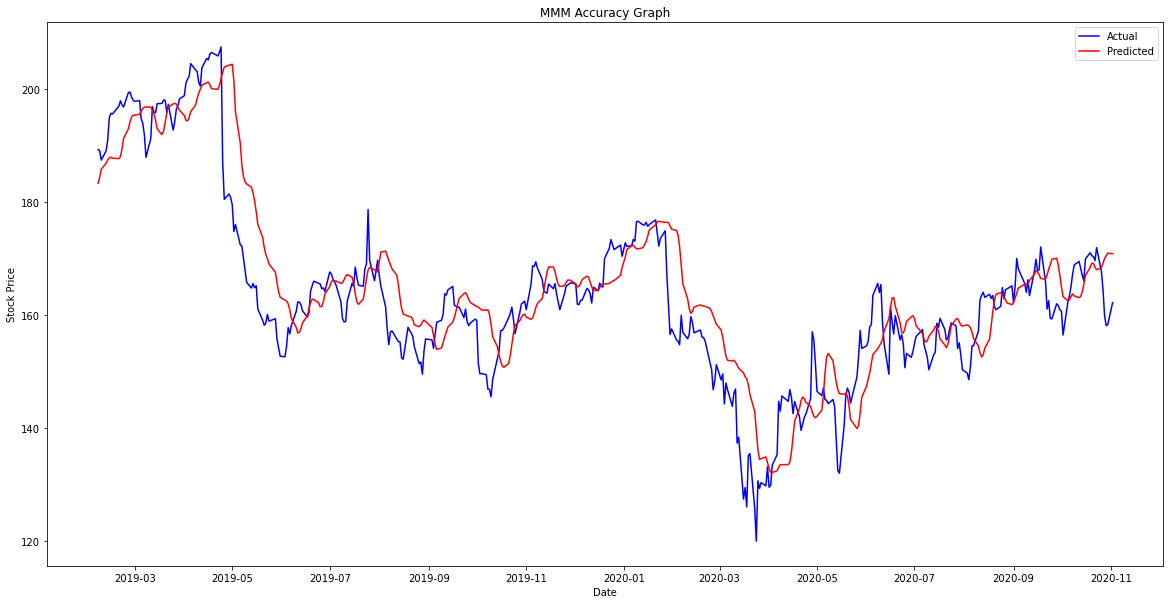

In [57]:
plt.figure(figsize=(20,10))
plt.plot(df['Open'], color='blue')
plt.plot(df['Open2'], color='red')
plt.title(S+" Accuracy Graph")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend(['Actual','Predicted'])
plt.savefig("..//model_data//"+S+'_accuracy_graph.png')

In [58]:
pred_df=pd.DataFrame(predicted_stock_price)
act_df= pd.DataFrame(actual_stock_price)

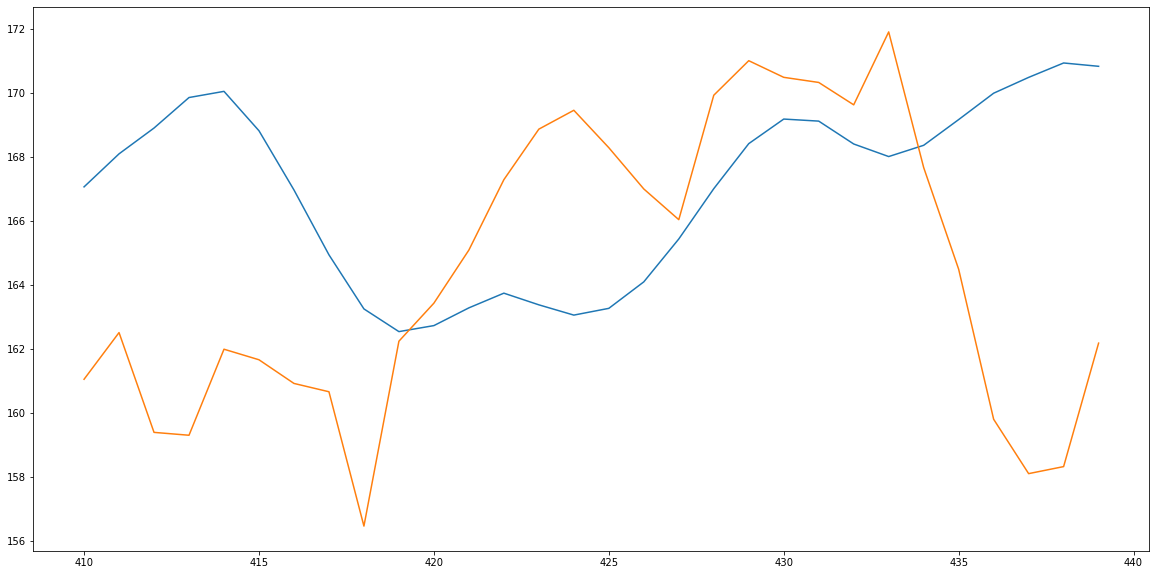

In [59]:
plt.figure(figsize=(20,10))
length= len(pred_df)
plt.plot(pred_df[length-30:])
plt.plot(act_df[length-30:])

In [60]:
import pickle
Pkl_Filename = "..//model_data//"+S+"_Model.pkl"  
sc_file= "..//model_data//"+S+"_sc.pkl"

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(regressor, file)
    
with open(sc_file, 'wb') as file:  
    pickle.dump(sc, file)